<a href="https://colab.research.google.com/github/Temmy-bit/Advance-Computer-Vision-Course/blob/main/LBPH_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')
from PIL import Image

Mounted at /content/drive


In [2]:
import zipfile
filepath = '/content/drive/MyDrive/Computer Vision Masterclass/Datasets/yalefaces.zip'
zip_object = zipfile.ZipFile(file=filepath,mode='r')
zip_object.extractall('./')
zip_object.close()

In [3]:
print(os.listdir('/content/yalefaces/train'))

['subject01.sad.gif', 'subject05.wink.gif', 'subject14.surprised.gif', 'subject13.centerlight.gif', 'subject13.rightlight.gif', 'subject10.leftlight.gif', 'subject12.leftlight.gif', 'subject04.happy.gif', 'subject07.surprised.gif', 'subject15.glasses.gif', 'subject11.surprised.gif', 'subject04.glasses.gif', 'subject09.wink.gif', 'subject10.rightlight.gif', 'subject05.glasses.gif', 'subject06.normal.gif', 'subject06.sad.gif', 'subject09.glasses.gif', 'subject06.glasses.gif', 'subject08.happy.gif', 'subject08.noglasses.gif', 'subject12.sleepy.gif', 'subject02.sleepy.gif', 'subject10.noglasses.gif', 'subject15.sleepy.gif', 'subject06.centerlight.gif', 'subject08.sleepy.gif', 'subject15.normal.gif', 'subject03.wink.gif', 'subject04.normal.gif', 'subject08.sad.gif', 'subject01.sleepy.gif', 'subject11.sleepy.gif', 'subject14.centerlight.gif', 'subject12.centerlight.gif', 'subject04.noglasses.gif', 'subject10.surprised.gif', 'subject03.happy.gif', 'subject07.sleepy.gif', 'subject05.normal.gif

In [4]:
def get_image_data():
  paths = [os.path.join('/content/yalefaces/train',f) for f in os.listdir('/content/yalefaces/train')]
  # print(paths)
  faces = []
  ids = []
  for path in paths:
    img = Image.open(path).convert('L')
    img_np = np.array(img,'uint8')
    faces.append(img_np)

    id = int(os.path.split(path)[-1].split('.')[0].replace('subject',''))
    # print(id)
    ids.append(id)
  ids = np.array(ids)
  return faces,ids

In [5]:
faces,ids = get_image_data()

In [6]:
ids

array([ 1,  5, 14, 13, 13, 10, 12,  4,  7, 15, 11,  4,  9, 10,  5,  6,  6,
        9,  6,  8,  8, 12,  2, 10, 15,  6,  8, 15,  3,  4,  8,  1, 11, 14,
       12,  4, 10,  3,  7,  5,  9,  7,  5,  9,  6,  9, 11, 14, 13,  3,  7,
       10, 15,  6, 11, 11, 10,  3,  9, 14,  2, 11,  2, 10, 12,  1,  8,  5,
       14,  5,  6,  8, 14,  4, 12,  2, 13, 14,  4, 12, 11,  1,  8,  2, 15,
       11,  5,  5,  8,  1,  7, 13, 10,  5,  1, 13, 12,  7,  7, 12,  7,  4,
        9, 15,  3,  8, 13,  1,  3,  1, 14, 12,  2, 15,  9,  1,  2, 15, 13,
        6, 10,  4,  3, 11,  6,  2,  7, 14,  4,  9,  3,  3, 15, 13,  2])

In [7]:
len(ids)

135

In [8]:
faces[5], faces[5].shape

(array([[130, 130, 130, ..., 255, 255, 250],
        [255, 255, 255, ..., 255, 255, 249],
        [255, 255, 255, ..., 255, 243, 235],
        ...,
        [255, 255, 255, ...,  60,  60,  61],
        [255, 255, 255, ...,  59,  57,  60],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 (243, 320))

In [9]:
np.multiply(243, 320)/2

np.float64(38880.0)

### LBPH Parameters

In [10]:
# threshold
# radius
# neighbors
# grid_x
# grid_y

### Recognizing Faces

In [13]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create(radius=4,neighbors = 14,grid_x=10,grid_y=10)
lbph_classifier.train(faces,ids)
lbph_classifier.write('/content/lbph_classifier.yml')

In [14]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier.yml')

array([[119, 129, 130, ..., 255, 255, 255],
       [252, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ...,  91,  89,  93],
       [255, 255, 255, ..., 102,  97, 102],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)
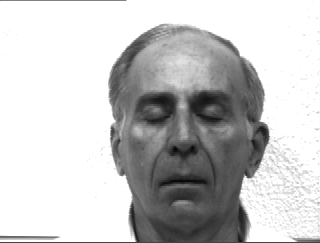

In [15]:
test_image = '/content/yalefaces/test/subject05.sleepy.gif'
image_np = np.array(Image.open(test_image).convert('L'),'uint8')
image_np

In [16]:
image_np.shape

(243, 320)

In [17]:
prediction = lbph_face_classifier.predict(image_np)
prediction

(5, 56.81391016455798)

In [18]:
expected_output = int(os.path.split(test_image)[-1].split('.')[0].replace('subject',''))
expected_output

5

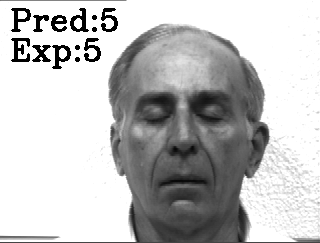

In [19]:
cv2.putText(image_np,"Pred:"+str(prediction[0]),(10,30),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
cv2.putText(image_np,"Exp:"+str(expected_output),(10,60),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
cv2_imshow(image_np)

In [20]:
paths = [os.path.join('/content/yalefaces/test',f) for f in os.listdir('/content/yalefaces/test')]
predictions = []
expected_outputs = []

for path in paths:
  image_np = np.array(Image.open(path).convert('L'),'uint8')
  expected_output = int(os.path.split(path)[-1].split('.')[0].replace('subject',''))
  # print(expected_output)
  prediction = lbph_face_classifier.predict(image_np)
  predictions.append(prediction[0])
  expected_outputs.append(expected_output)

In [21]:
predictions = np.array(predictions)
expected_outputs = np.array(expected_outputs)

In [22]:
predictions

array([14,  4,  8,  9,  4, 11, 15,  3, 12,  7,  7, 14,  4,  4,  6, 14,  5,
        4,  9, 11, 12,  7,  3,  1,  4, 10, 13, 12, 13,  5])

In [23]:
expected_outputs

array([ 6, 10,  8,  7,  1, 11, 15,  3, 12, 15,  9, 14,  8,  2,  6, 14,  5,
        4,  9, 11,  2,  7,  3,  1,  4, 10, 13, 12, 13,  5])

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(expected_outputs,predictions)

0.7

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_outputs,predictions)
cm

array([[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

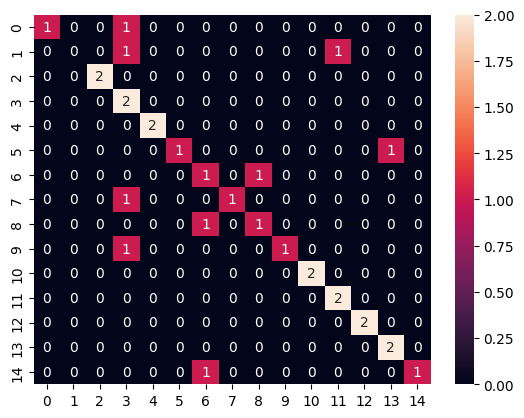

In [26]:
import seaborn as sns
sns.heatmap(cm,annot=True);